# <center>《Kaggle Top 1%方案精讲与实践》

# <font face="仿宋">课程说明：

&emsp;&emsp;<font face="仿宋">小伙伴好呀\~欢迎来到《2021机器学习实战训练营》试学体验课！我是课程主讲老师，九天。       
&emsp;&emsp;本次体验课为期三天（12月8-10号），期间每晚8点在我的B站直播间公开直播，直播间地址:https://live.bilibili.com/22678166      
&emsp;&emsp;本期公开课的内容是在上一轮Kaggle竞赛公开课（《Elo Merchant Category Recommendation》）的基础上，进一步探讨如何进一步将排名提升至1%。在接下来的三天内容中，我们将进一步尝试多模型建模与优化、模型融合方法、特征优化与Trick优化等方法，从而在此前的结果基础上大幅提高模型预测准确率。        
&emsp;&emsp;当然，没有参与上一轮公开课的小伙伴也不用担心，本轮公开课将在开始时我们将快速回顾上一轮公开课内容，并将提供上一轮公开课最终完成的数据处理结果与相关代码，帮助大家无门槛进入本轮课程内容的学习中。当然，如果时间允许，也希望大家能够通过观看上一轮公开课的直播录屏，以巩固相关知识。上一轮公开课直播录屏地址：https://www.bilibili.com/video/BV1QU4y1u7Ph      
&emsp;&emsp;课程资料/赛题数据/课程代码/付费课程信息，扫码添加客服“小可爱”回复【kaggle】即可领取哦~

<center><img src="https://i.loli.net/2021/10/20/ZWTgxSiNY1db9eL.png" alt="二维码" style="zoom:33%;" />

&emsp;&emsp;<font face="仿宋">另外，双十二年终大促持续进行中，十八周80+课时体系大课限时七折，扫码咨询小可爱回复“优惠”，还可领取额外折上折优惠，课程主页：https://appze9inzwc2314.pc.xiaoe-tech.com

# <center>【Kaggle】Elo Merchant Category Recommendation    
# <center> 竞赛案例解析公开课 Part II

# <center>Day 4.海量特征池衍生策略与Baseline创建

&emsp;&emsp;由于接下来的内容承接上一轮公开课内容，为了帮助大家快速回顾Part I内容，在今天的内容开始之前，我们快速回顾本部分案例教学的Part I相关内容。

## <center> 一、Elo Merchant Category Recommendation案例Part I内容回顾

### 1.赛题回顾

&emsp;&emsp;本次公开课的案例选自Kaggle竞赛赛题：[Elo Merchant Category Recommendation](https://www.kaggle.com/c/elo-merchant-category-recommendation)。该比赛举办于2019年，本次比赛总共持续将近4个月时间，有共计四千余只战队参赛，奖金池高达5万美元，属于算法竞赛中的大型赛事。

<center><img src="https://i.loli.net/2021/10/20/DplYIfdsh3JCbEO.png" alt="1" style="zoom:50%;" />

- 巴西支付品牌Elo        
&emsp;&emsp;本次竞赛其实是由巴西最大的支付品牌之一的Elo和Kaggle合作举办的比赛，奖金和数据都由Elo公司提供。谈到支付品牌，国内用户首先会想到类似支付宝、PayPal这些带有浓烈互联网色彩的支付品牌，但是在巴西，线上支付更多是由本地银行主导，且线上支付的信贷产品也主要以信用卡为主。Elo就是这样的一家公司，在2011年由巴西三家主要银行合资创立，主要负责线上支付业务，并且以信用卡作为核心金融产品，目前已发放超过1.1亿张信用卡，是巴西最大的本地在线支付品牌之一。

<center><img src="https://i.loli.net/2021/10/20/SwXTECfVOHLMAr7.png" alt="4" style="zoom:25%;" />

并且，Elo不仅是支付入口，更是一个“o2o”平台，通过App，用户可以查阅本地餐饮旅馆电影旅游机票等各项服务，并支持信用卡在线支付。形象点理解，就好比把美团主页移到支付宝，并且支付宝没有花呗，取而代之的是自己发行的信用卡。或者更加形象的理解，就类似国内招行信用卡掌上生活的业务模式：

<center><img src="https://i.loli.net/2021/10/20/sAQmTcvw5P8fHdV.png" alt="3" style="zoom:20%;" />

- 业务目标：更好的进行本地服务推荐      
&emsp;&emsp;在官方给出的说明中，我们不难发现，Elo使用机器学习算法技术的核心目的，是为了更好的在App内为用户推荐当地吃穿住行的商家服务，包括热门餐厅展示、优惠折扣提醒等（非常类似上图掌上生活首页的推荐）。也就是说，其根本目的是为了推荐，或者说为每个用户进行更加个性化的推荐，也就是赛题标题中的所写的：Merchant Category Recommendation（商户类别推荐）。但是，需要注意的是，本次竞赛的建模目标却和推荐系统并不直接相关。赛题说明中，在介绍完业务目标之后，紧接着就介绍了本次赛题的目标：对用户的忠诚度评分进行预测。

### 2.数据获取

- 通过Kaggle平台获取数据

&emsp;&emsp;首先，我们可以考虑在Kaggle平台上直接获取数据，可以直接通过网页端进行下载，也可以直接通过命令行进行下载，关于Kaggle平台的使用方法以及通过Kaggle平台获取更多资讯的方法，可以参考公开课中Day 1的内容，课件获取添加客服小可爱回复【kaggle】即可，Day 1录播视频地址：https://www.bilibili.com/video/BV1QU4y1u7Ph

- 网盘下载

&emsp;&emsp;当然，为了方便大家更加快速的进入到本轮课程的学习，我们已经将上一轮公开课中所有资料打包上传，其中就包括了原始数据与预处理后的数据（当然也包括了最终提交的结果数据），大家可以通过小可爱分享的文件直接进行下载。

<center><img src="https://s2.loli.net/2021/12/07/PUyB8EXpFsI4MlW.png" alt="image-20211207161308184" style="zoom:50%;" />

### 3.数据表简介

&emsp;&emsp;首先查看原始数据，能够看到，本次赛题数据较多、数据量也相对较大，部分数据甚至无法直接通过普通Excel直接打开。接下来我们快速了解每个数据集的基本含义：

<center><img src="https://i.loli.net/2021/10/21/lnVaXHg24vwM1fQ.png" alt="image-20211021110745226" style="zoom:50%;" />

&emsp;&emsp;总的来说，上述7个数据文件大概可以分为三类，其一是基本信息类数据集，包括Data_Dictionary和sample_submission。其中Data_Dictionary数据集是所有数据的数据字典，即包括了所有数据各字段的含义，而sample_submission则是提交结果时的范例数据。

- Data Dictionary/Data_Dictionary：数据字典

&emsp;&emsp;所有其他数据表中每个字段的含义，相当于是其他各数据表的说明书。数据字典包含多个sheet，每个sheet对应一个数据表的字段和解释：

<center><img src="https://i.loli.net/2021/10/20/ilGc7hrAwMZNpS8.png" alt="image-20211020204816830" style="zoom:50%;" />

- sample_submission：正确提交结果范例

&emsp;&emsp;最终建模结果提交格式，也就是以“一个id”+“对应预测结果”的格式进行提交。据此我们也能发现，实际上我们是需要预测每个card_id的用户忠诚度评分。我们也可以在竞赛Kaggle主页上查看提交结果格式和评估指标：

In [2]:
import os
import numpy as np
import pandas as pd

In [4]:
# 读取数据文件
pd.read_csv('./data/sample_submission.csv', header=0).head(5)

,card_id,target
0,C_ID_0ab67a22ab,0
1,C_ID_130fd0cbdd,0
2,C_ID_b709037bc5,0
3,C_ID_d27d835a9f,0
4,C_ID_2b5e3df5c2,0


<center><img src="https://i.loli.net/2021/10/20/tveFu12sbNcAfwH.png" alt="image-20211020211206067" style="zoom:35%;" />

RMSE的计算过程如下：

$$RMSE= \sqrt{\frac{1}{n}\sum^n_{i=1}(y_i-\hat y_i)^2}$$

- train/test：训练/测试数据集

&emsp;&emsp;同时，我们能看到最为关键的两个数据集：训练和测试数据集，其中训练数据集包含了训练模型必备的特征和标签，而测试数据集则包含了和训练数据集相同的特征，但没有标签。在实际建模过程中，在极简情况下我们可以只带入训练数据集进行模型训练，然后在测试集上进行测试。我们可以简单查看训练数据集各特征的基本含义：

In [78]:
train = pd.read_csv('./data/train.csv')
test =  pd.read_csv('./data/test.csv')

In [7]:
# 查看数据集规模
(train.shape, test.shape)

((201917, 6), (123623, 5))

In [8]:
# 查看前5条数据
train.head(5)

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


依次对这些列的含义进行解读

| 字段 | 解释 |
| ------ | ------ |
| card_id | 第一无二的信用卡标志 |
| first_active_month | 信用卡首次激活时间，按照类似2017-02排列 |
| feature_1/2/3 | 匿名特征（不带明显业务背景或人工合成的特征） |
| target | 标签，忠诚度评分 |

当然，测试集的特征和训练集特征相同。

In [9]:
test.head(5)

,first_active_month,card_id,feature_1,feature_2,feature_3
0,2017-04,C_ID_0ab67a22ab,3,3,1
1,2017-01,C_ID_130fd0cbdd,2,3,0
2,2017-08,C_ID_b709037bc5,5,1,1
3,2017-12,C_ID_d27d835a9f,2,1,0
4,2015-12,C_ID_2b5e3df5c2,5,1,1


&emsp;&emsp;在赛题的所有数据中，除了给出了必要的训练集和测试集外，还给出了一些“补充”数据集，即每张信用卡在过去的几年内的消费情况（transaction数据集），以及消费商户的基本情况（merchant数据集）。很明显，如果能够更好的挖掘这些数据集中的有效信息，则能够获得更好的预测结果。

<center><img src="https://s2.loli.net/2021/12/07/2JY57Cimd9lpIbN.png" alt="image-20211207163441310" style="zoom:50%;" />

- historical_transactions/new_merchant_transactions：信用卡历史交易数据

&emsp;&emsp;在官方给出的数据集中，信用卡历史交易数据被划分成了两个不同的数据集，这两个数据集特征一致，二者的区分仅仅在于记录时间，即historical_transactions记录了18年2月以前的交易数据，而new_merchant_transactions则记录了18年2月之后的交易数据。并且由于时间跨度较大、信息统计维度较多，因此交易数据集本身规模非常巨大（接近3G大小），有超过三千万条数据，已经远超Excel默认能够打开的数据集规模，而若要用Python进行读取，也建议在使用完该对象后使用del（删除）+gc（内存清理）的方式清理内存。

&emsp;&emsp;此处以相对更大的historical_transactions数据集来进行读取与字段解读，new_merchant_transactions数据集也是类似（二者特征完全一致）：

In [4]:
history_transaction = pd.read_csv('./data/historical_transactions.csv', header=0)

In [12]:
history_transaction.shape

(29112361, 14)

In [11]:
history_transaction.head(5)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


每个字段的实际含义如下：

| 字段 | 解释 |
| ------ | ------ |
| card_id | 第一无二的信用卡标志 |
| authorized_flag | 是否授权，Y/N |
| city_id | 城市id，经过匿名处理 |
| category_1 | 匿名特征，Y/N |
| installments | 分期付款的次数 |
| category_3 | 匿名类别特征，A/.../E |
| merchant_category_id | 商户类别，匿名特征 |
| merchant_id | 商户id |
| month_lag	 | 距离2018年月的2月数差 |
| purchase_amount | 标准化后的付款金额 |
| purchase_date | 付款时间 |
| category_2 | 匿名类别特征2 |
| state_id | 州id，经过匿名处理 |
| subsector_id | 商户类别特征 |

&emsp;&emsp;根据数据集和训练/测试数据集规模比较，我们能很明显的判断，交易数据（三千万条数据）与训练/测试数据（三十万条数据）其实是“一对多”的关系，即交易数据实际上记录了训练/测试集中每张信用卡的多次消费记录，而这种一对多的关系，会很大程度上影响后续的数据处理思路（至少无法直接按照card_id进行多表拼接）。例如我们挑选训练数据集中的第一条数据，查看card_id

In [9]:
train.loc[0]

first_active_month            2017-06
card_id               C_ID_92a2005557
feature_1                           5
feature_2                           2
feature_3                           1
target                      -0.820283
Name: 0, dtype: object

而该id则极有可能在历史交易数据中出现多次：

In [11]:
history_transaction[history_transaction['card_id'] == 'C_ID_92a2005557']

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
12454872,Y,C_ID_92a2005557,69,N,0,A,195,M_ID_cc72dac895,-3,-0.506033,2017-11-25 16:37:11,1.0,9,34
12454873,Y,C_ID_92a2005557,69,N,0,A,278,M_ID_c9c0f1cb3f,-7,-0.722114,2017-07-16 12:21:00,1.0,9,37
12454874,Y,C_ID_92a2005557,69,N,0,A,683,M_ID_36f9e41993,-6,-0.726171,2017-08-10 21:01:16,1.0,9,34
12454875,Y,C_ID_92a2005557,69,N,0,A,309,M_ID_b790230ee9,-2,-0.610167,2017-12-15 12:06:58,1.0,9,21
12454876,Y,C_ID_92a2005557,69,N,0,A,278,M_ID_ab67f6c982,-7,-0.307232,2017-07-08 15:13:18,1.0,9,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12455127,Y,C_ID_92a2005557,69,N,0,A,561,M_ID_50f575c681,-2,-0.725465,2017-12-26 14:14:42,1.0,9,7
12455128,Y,C_ID_92a2005557,69,N,0,A,309,M_ID_b790230ee9,-2,-0.553066,2017-12-14 12:59:55,1.0,9,21
12455129,Y,C_ID_92a2005557,69,N,0,A,818,M_ID_b66f23e4da,-2,-0.634209,2017-12-24 10:30:34,1.0,9,12
12455130,N,C_ID_92a2005557,69,N,0,A,278,M_ID_35d5f43c28,-7,-0.431922,2017-07-15 14:58:10,1.0,9,37


此外，我们也能发现，在信用卡消费记录中包含了消费商户的一系列基本信息，而这些信息将进一步关联商户信息表merchants.csv，该部分内容稍后会详细介绍。

- merchants：商户信息表

&emsp;&emsp;如果说信用卡交易数据还是属于训练/测试数据的一级关联数据（可以通过card_id直接关联），那么商户信息则是训练/测试数据的次级关联数据，商户信息只能通过商户id（merchant_id）和交易数据表关联，从而进一步和训练/测试集关联，因此我们可以将其视作主表的次级关联表。

In [12]:
# 导入数据
merchant = pd.read_csv('./data/merchants.csv', header=0)

In [19]:
merchant.head(5)

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


特征解释如下：

| 字段 | 解释 |
| ------ | ------ |
| merchant_id | 商户id |
| merchant_group_id | 商户组id |
| merchant_category_id | 商户类别id |
| subsector_id | 商品种类群id |
| numerical_1 | 匿名数值特征1 |
| numerical_2 | 匿名数值特征2 |
| category_1 | 匿名离散特征1 |
| most_recent_sales_range | 上个活跃月份收入等级，有序分类变量A>B>...>E |
| most_recent_purchases_range | 上个活跃月份交易数量等级，有序分类变量A>B>...>E |
| avg_sales_lag3/6/12 | 过去3、6、12个月的月平均收入除以上一个活跃月份的收入 |
| avg_purchases_lag3/6/12 | 过去3、6、12个月的月平均交易量除以上一个活跃月份的交易量 |
| active_months_lag3/6/12 | 过去3、6、12个月的活跃月份数量 |
| category_2 | 匿名离散特征2 |

当然，由于商户信息表只能和交易数据关联，因此后续在进行表格合并时会先合并商户信息表与交易信息表。此处我们也可对其进行简单验证，我们挑选交易数据表中的第一条交易数据中的商户信息：

In [14]:
history_transaction.head(1)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37


In [17]:
merchant[merchant['merchant_id'] == 'M_ID_e020e9b302']

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
334495,M_ID_e020e9b302,35,80,37,23.470597,23.014512,N,A,A,1.08,...,1.14,1.114135,6,1.19,1.156844,12,Y,88,16,1.0


据此，在后续的数据表拼接过程中，基本思路为两个交易数据表纵向拼接，商户信息表和交易数据表根据商户id横向拼接，而商户数据和交易数据拼接后所组成的补充信息大表如何和训练集和测试集拼接，则需要进一步采用特征工程的相关方法。

In [3]:
import gc

In [19]:
del history_transaction, merchant
gc.collect()

1715

### 4.数据预处理

&emsp;&emsp;当然，在实际进行表格拼接之前，我们还是需要对这几张数据表进行数据预处理。数据预处理目标与基本操作事项如下：

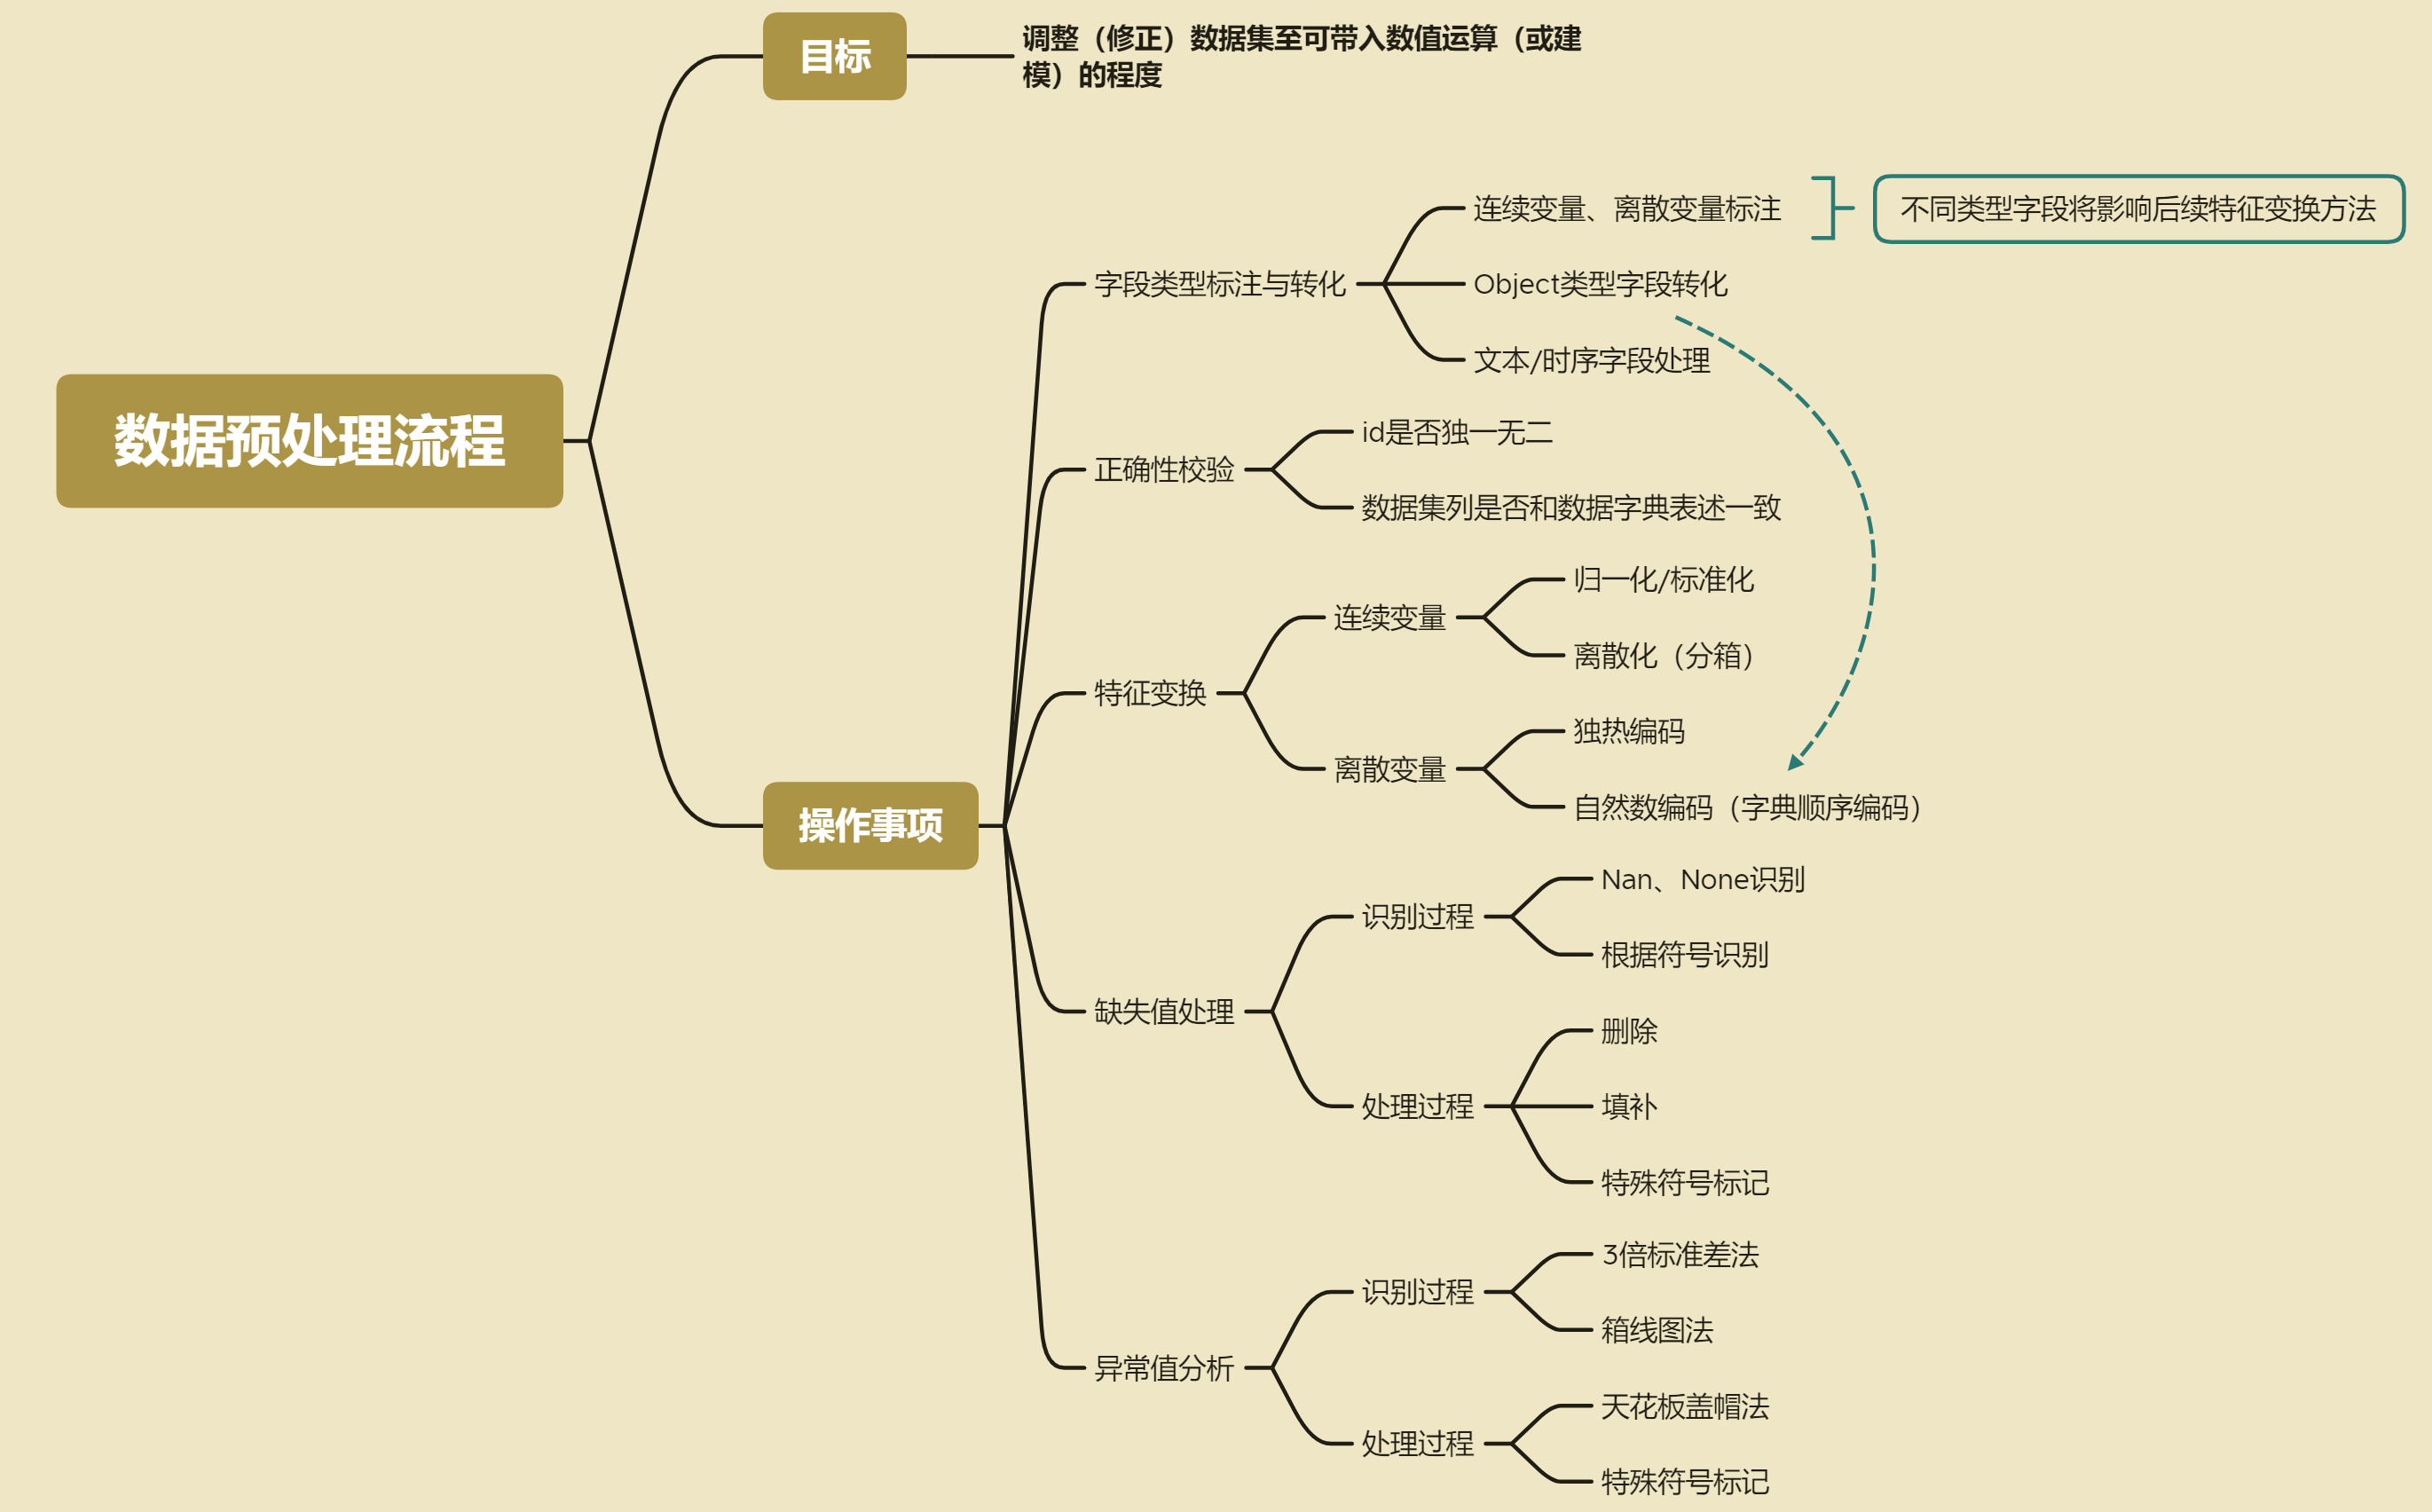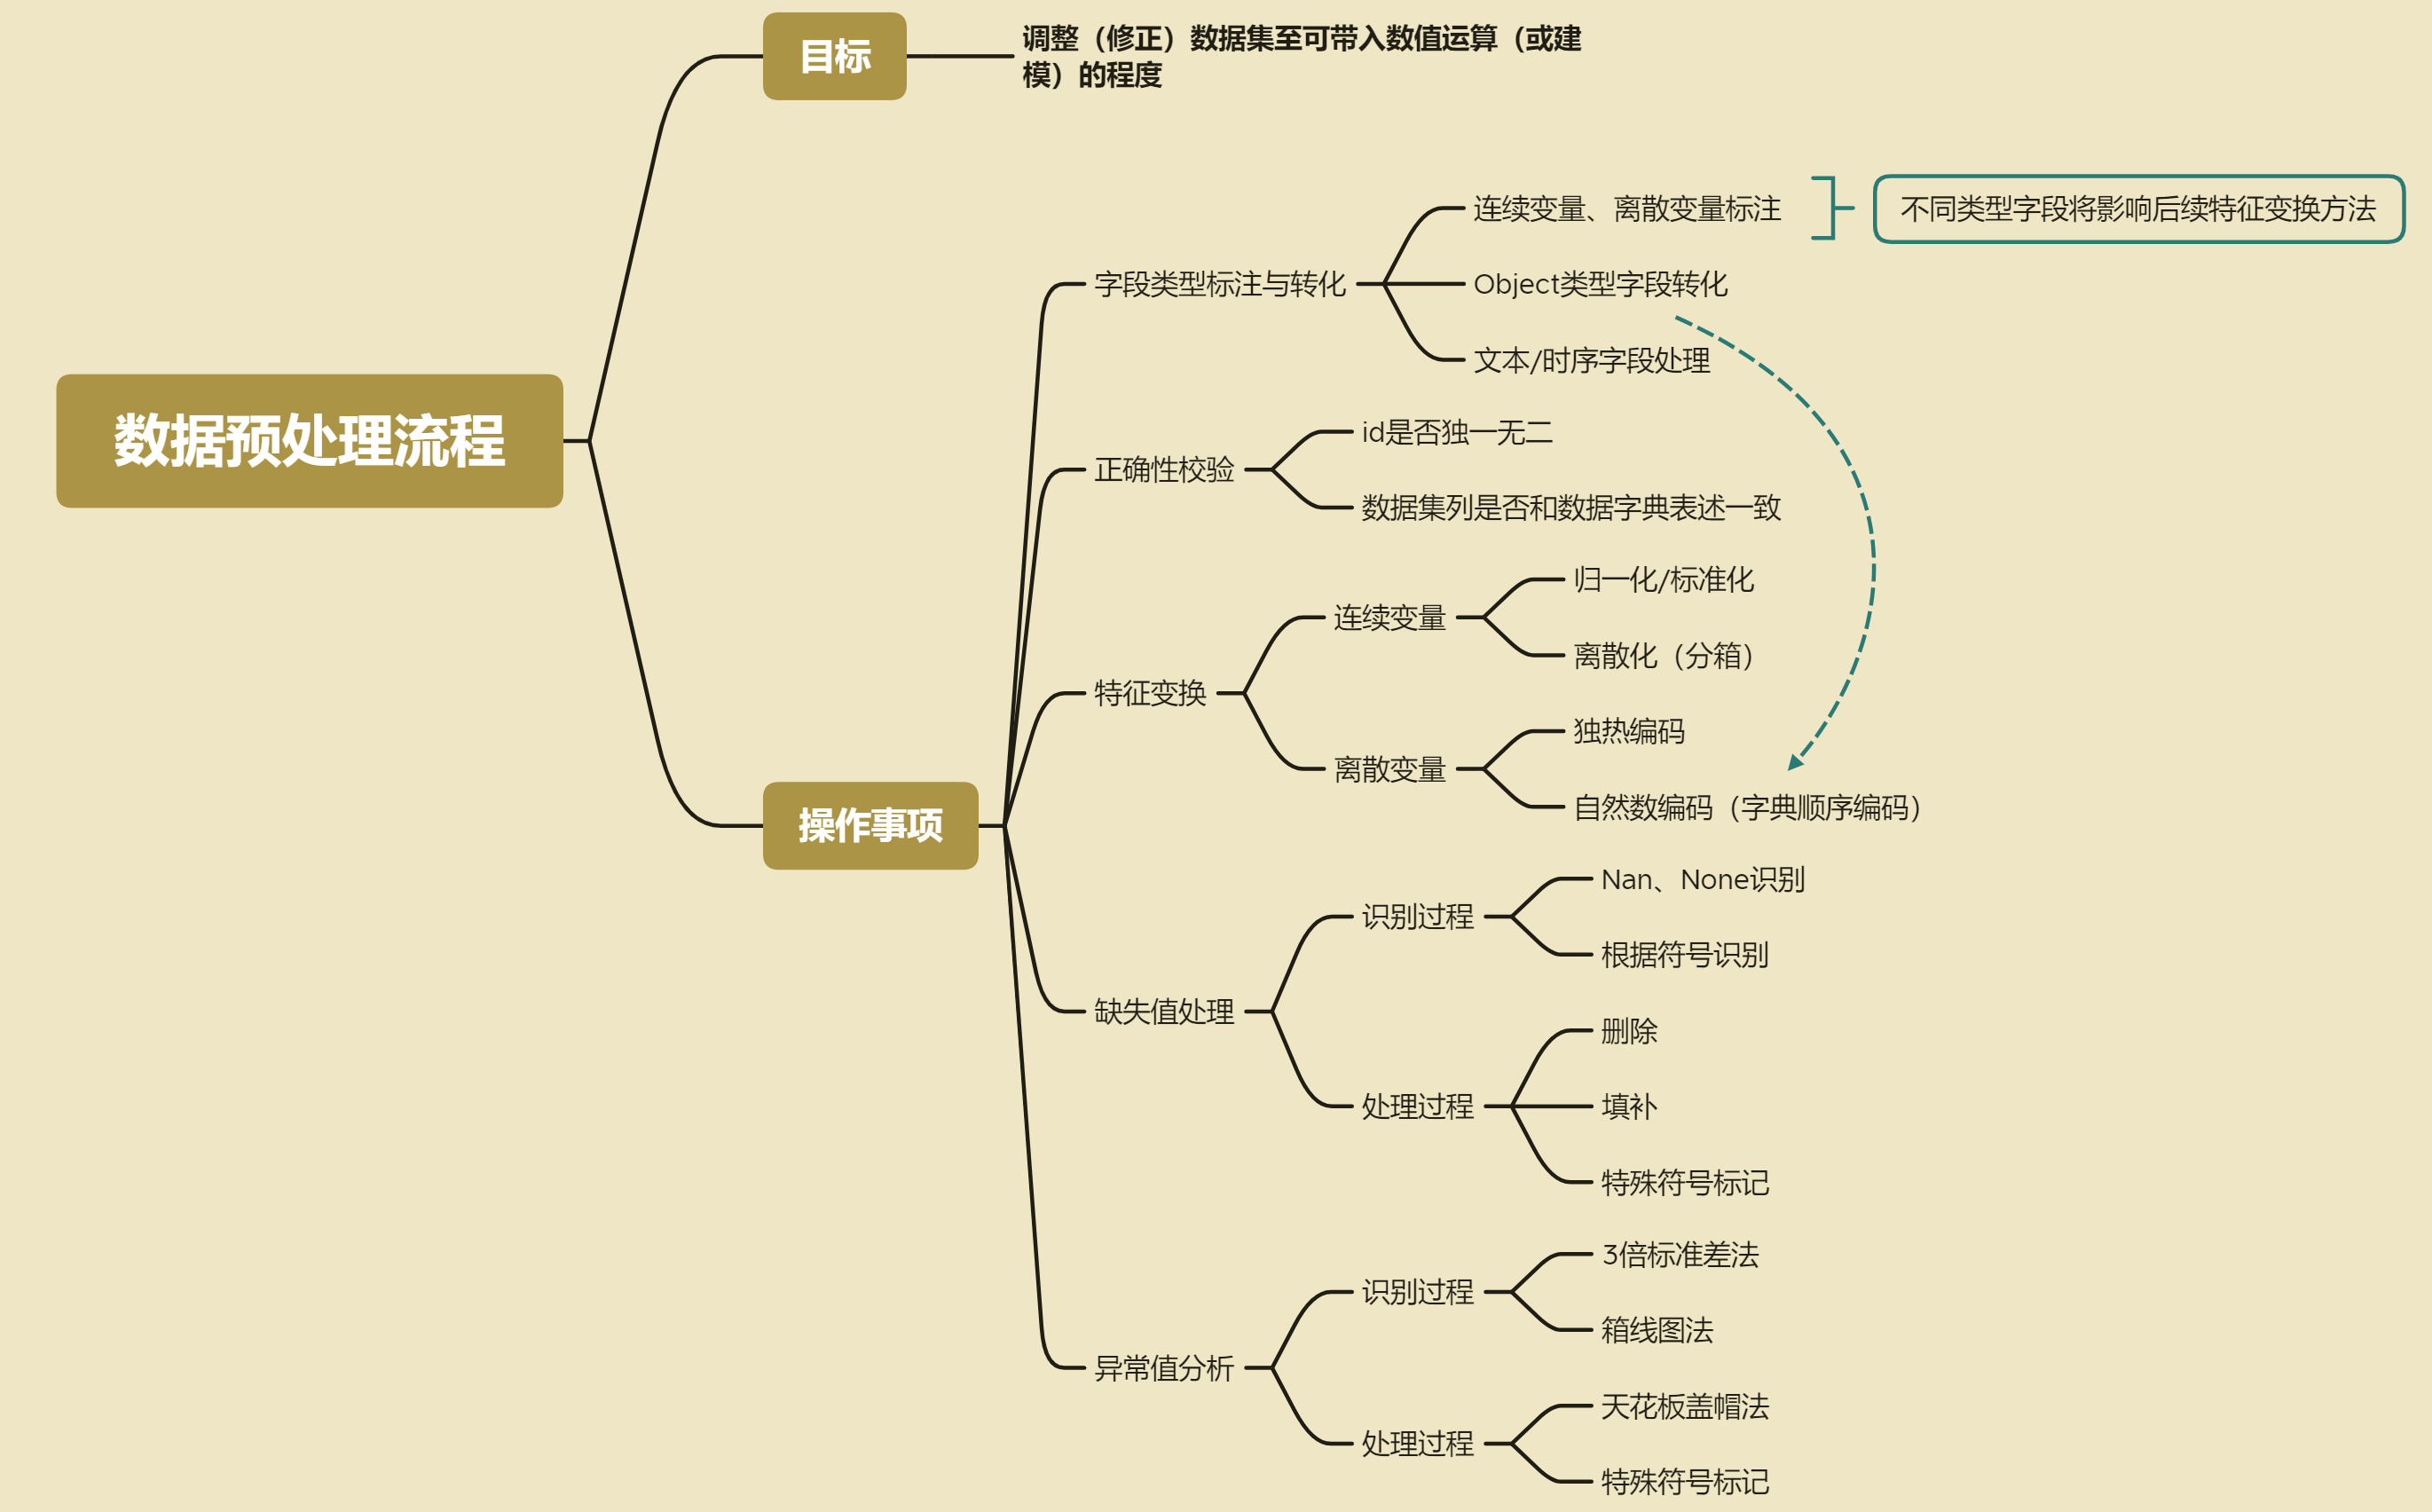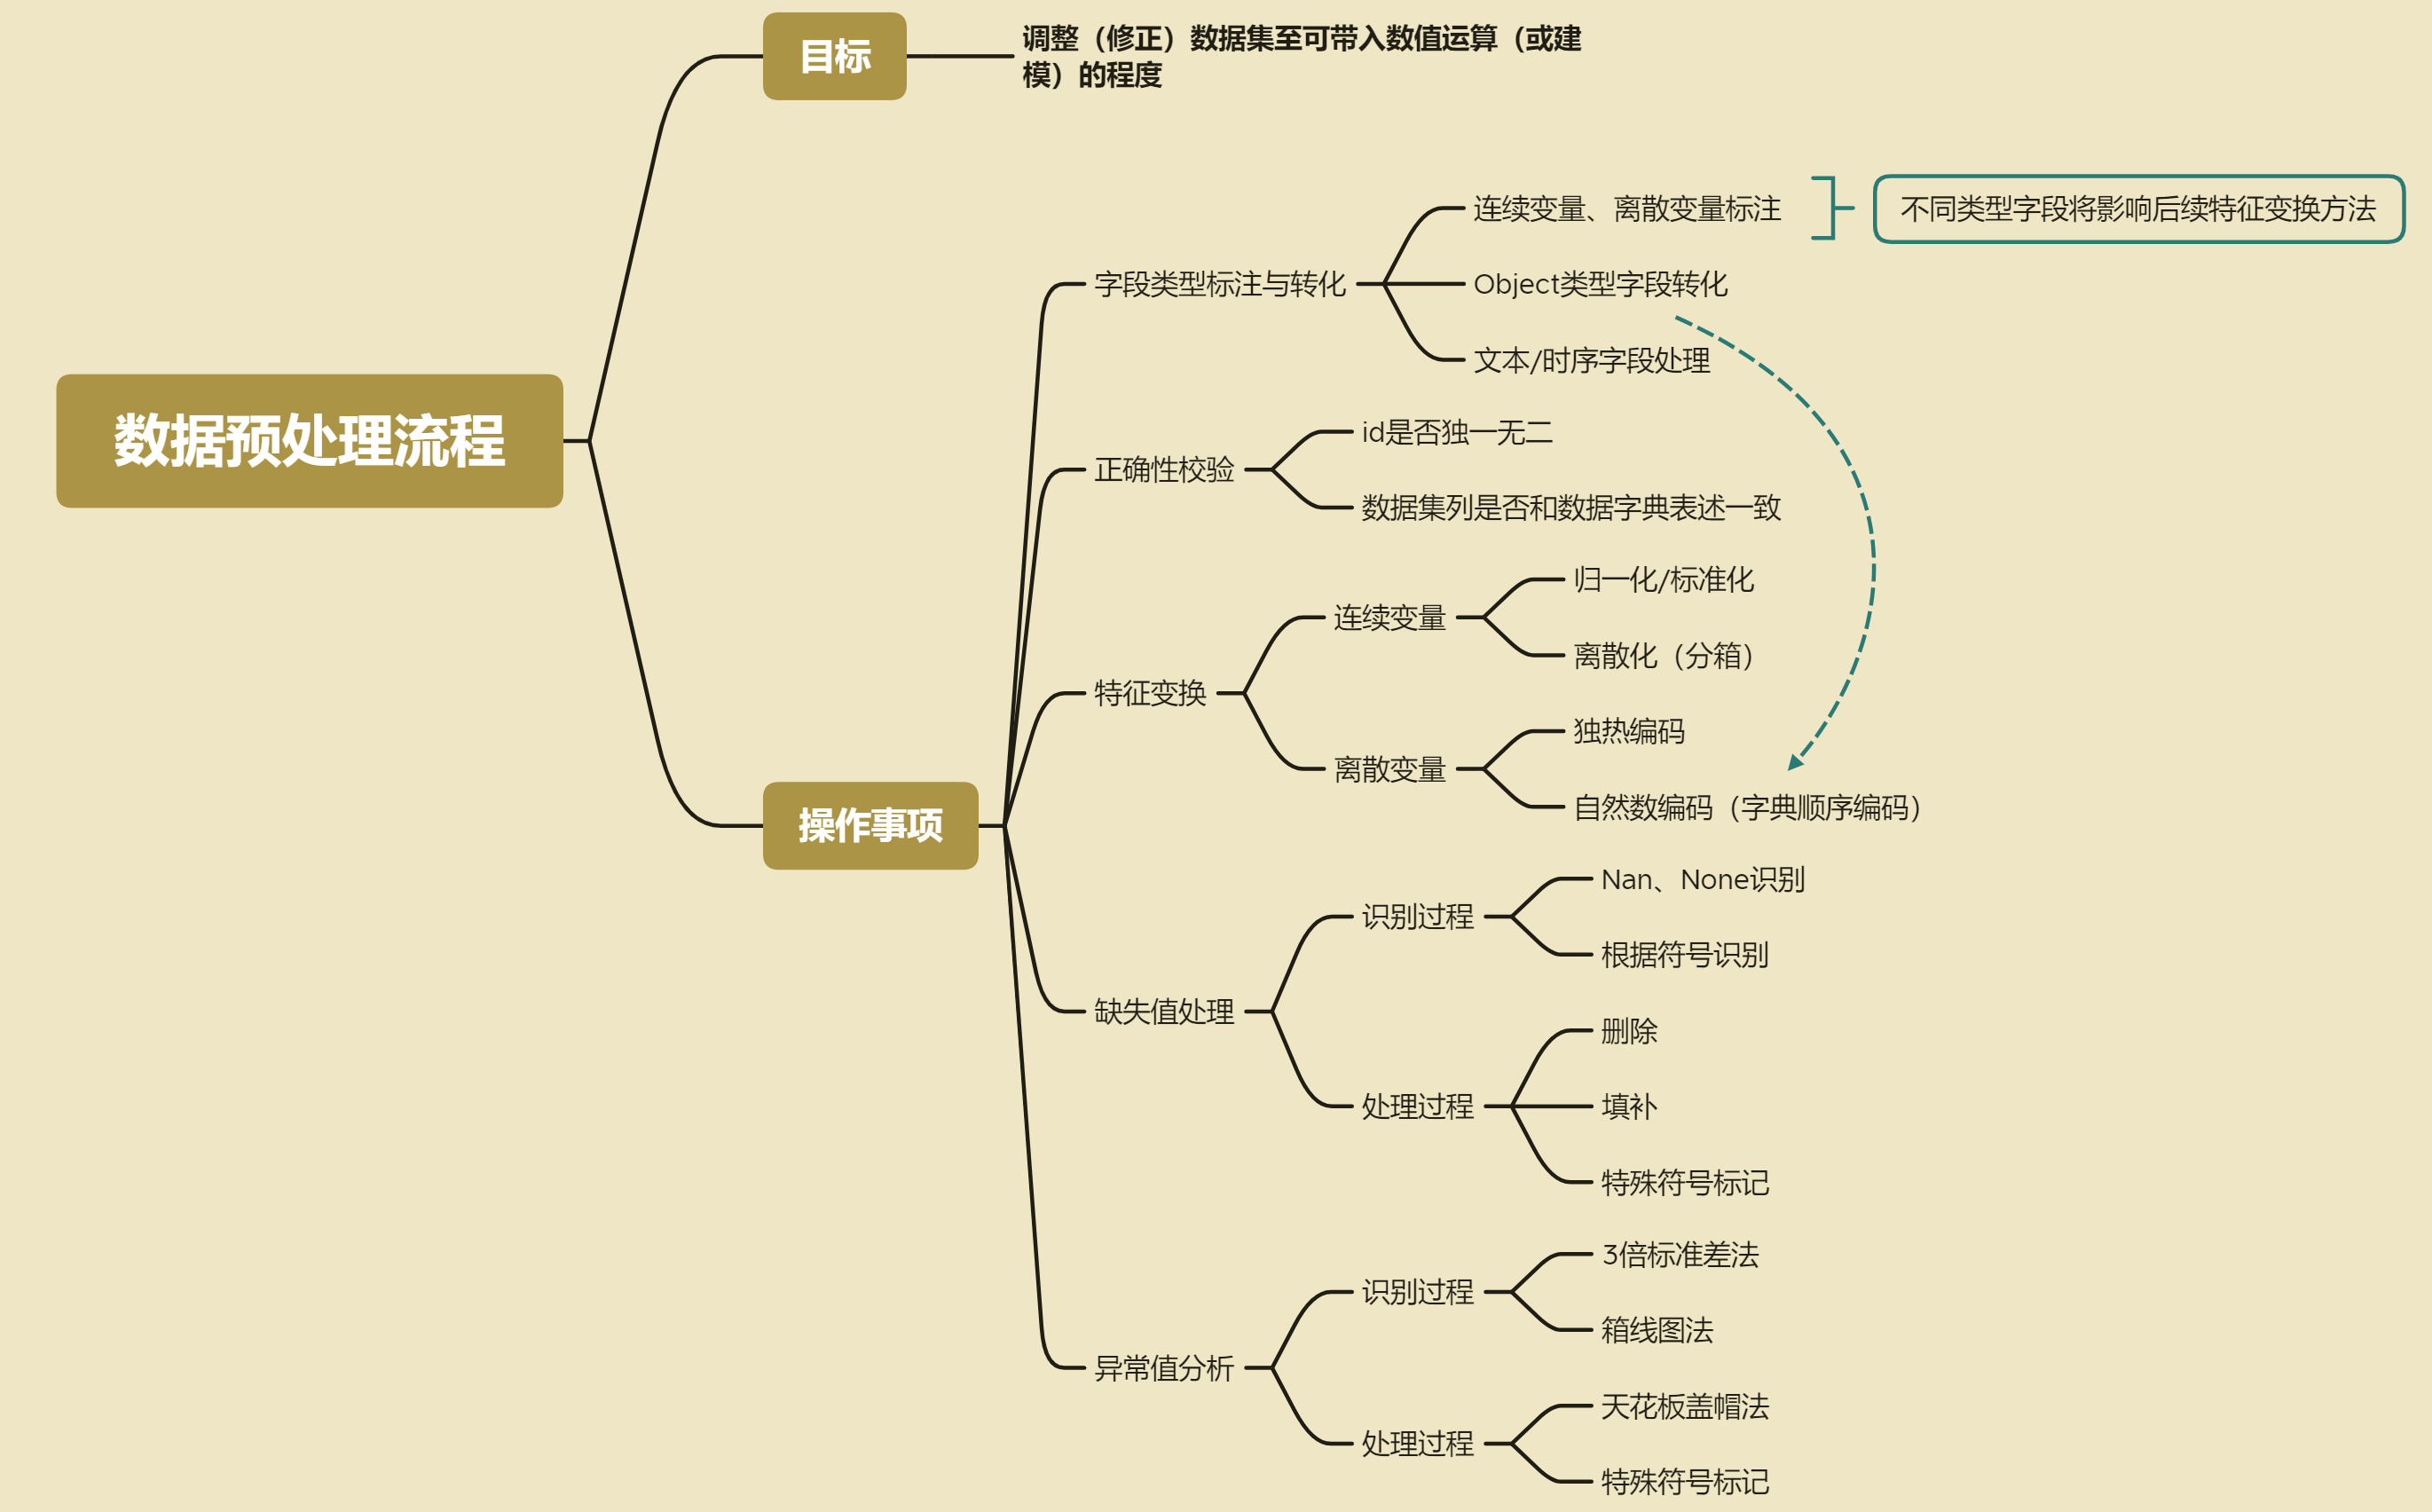<center><img src="https://s2.loli.net/2021/12/07/8NCHcZtxVMmGD3h.png" alt="image-20211207233714592" style="zoom:33%;" />

各字段的关键处理如下：

| 数据预处理 | train/test | transaction | merchant |
| ------ | ------ | ------ | ------ |
| 缺失值 | 单独编码 | -1标注 | -1标注 |
| 异常值 | 单独识别 | - | 天花板盖帽法 |

需要知道的是，相关内容已在上一轮公开课详细讲解，详细处理过程、相关代码、视频讲解，参见Part I中Day1-2中内容，微信回复小可爱【kaggle】即可获得课件，对应视频讲解地址：https://www.bilibili.com/video/BV1QU4y1u7Ph

### 5.特征工程与数据表拼接

&emsp;&emsp;在处理完没一张表之后，接下来即可对数据集进行拼接了，表格拼接的基本思路和此前介绍的一致，即先对两张交易数据表进行纵向拼接，然后将交易数据表与商户数据表按照商户id(merchant_id)进行拼接，然后再根据card_id拼接交易数据大表与原始训练/测试数据集。基本过程如下：

<center><img src="https://s2.loli.net/2021/12/07/9jwd1meblXaoUzh.png" alt="image-20211207235615308" style="zoom:50%;" />

其中补充信息数据集的拼接过程较为简单，而Step 3中将拼接后的交易数据大表拼接到训练/测试数据集的过程则需要借助一些特征工程的方法，将交易大表中多card_id的情况转化为单card_id情况，整体来看有两种策略，简单解释如下：

<center><img src="https://s2.loli.net/2021/12/08/gsfO4t5cBa7q61p.png" alt="image-20211208002218370" style="zoom:50%;" />

上述两种方法都是批量创建特征的常用方法，当然，在特征非常复杂的情况下，按照上述两种策略创建的特征数量也将非常多，这也导致后续建模前必须要进行特征筛选。

需要知道的是，相关内容已在上一轮公开课详细讲解，详细处理过程、相关代码、视频讲解，参见Part I中Day2中内容，微信回复小可爱【kaggle】即可获得课件，对应视频讲解地址：https://www.bilibili.com/video/BV1QU4y1u7Ph

&emsp;&emsp;同时，为了确保大家能够跟上本轮公开课的进度，经过数据处理及拼接后的数据也同时上传至网盘并保存在建模数据文件夹内，后续我们的建模工作将直接采用上述已经处理好的数据。注意，处理好的训练/测试数据集位置在Part 1>数据>建模数据文件夹内。

<center><img src="https://s2.loli.net/2021/12/08/5sM7K9AvCwuaI8i.png" alt="image-20211208115246777" style="zoom:50%;" />

- 案例Part II内容安排

&emsp;&emsp;在回顾完Part 1中介绍的内容之后，接下来正式进入到本轮公开课的内容，即围绕上述处理后的数据进行模型训练、优化，以及围绕建模进行进一步模型融合和特征优化，基本内容安排如下：

<center><img src="https://s2.loli.net/2021/12/08/2mewUjMshRdSy3r.png" alt="image-20211208121621466" style="zoom:50%;" />

## <center> 二、Filter特征筛选+随机森林建模+网格搜索调优

&emsp;&emsp;接下来首先尝试Filter特征筛选+随机森林建模+网格搜索调优的策略来训练第一组模型，当然，在Part I的结尾我们曾尝试随机森林建模，现在再次调用随机森林来建模，一方面是快速回顾此前的内容，同时由于接下来需要进行模型融合，因此我们需要手动保存一些模型训练的中间结果，因此需要改写Part I中的建模流程。

### 1.Filter特征筛选

- 特征筛选思路与方法

&emsp;&emsp;在特征总数较多且特征矩阵较为稀疏时，需要考虑在模型训练前进行特征筛选。我们知道，树模型及树模型的集成模型存在一定的特征筛选机制，即每棵树在进行训练的时候会优先选择能最大程度提升子集纯度的特征进行划分，但当特征太多时，尽管最终结果不一定会受到冗余（无用）特征影响，但模型效率会大幅降低，因此面对树模型及树模型的集成模型，我们仍然需要考虑在实际建模前进行特征筛选，优先带入有效特征进行建模。

&emsp;&emsp;而一般来说，特征筛选的方式主要有两类，其一是通过某些统计量对特征进行评估，在实际模型训练开始之前挑选出那些更加有效的特征并最终完成筛选，例如我们可以通过相关系数计算，判断特征和标签之间的相关关系，然后选取相关系数较大的特征带入进行建模，这种方法也被称为Filter方法；此外，我们也可以通过模型来筛选有效特征，例如随机森林模型可以输出特征重要性，我们可以先快速训练一个随机森林模型，然后根据输出的特征重要性，筛选更重要的特征带入后续超参数优化及交叉验证过程（需要知道的是，对于单独一个模型来说，是否带入冗余特征对单次训练来说影响不大，但由于超参数优化和交叉验证需要重复进行多轮训练，此时冗余特征的影响就会指数级上升），这样的特征筛选过程也被称为Wrapper过程。

&emsp;&emsp;在接下来的随机森林与LightGBM的模型训练过程中，我们将分别使用Filter方法和Wrapper方法进行特征筛选，但其实不同方法也是可以互换的，即我们也可以采用RF+Filter和LightGBM+Wrapper策略，同学们可以课后自行尝试这些组合。

- Filter相关系数特征筛选过程

&emsp;&emsp;接下来，我们尝试使用相关系数进行特征筛选。在目前处理好的数据中，特征总数高达1742，并且特征矩阵整体较为稀疏：

In [75]:
train = pd.read_csv('preprocess/train.csv')
test = pd.read_csv('preprocess/test.csv')

In [5]:
train.shape

(201917, 1742)

In [8]:
train.head(5)

,first_active_month,card_id,feature_1,feature_2,feature_3,target,authorized_flag&1&purchase_amount,authorized_flag&1&installments,city_id&19&purchase_amount,city_id&19&installments,...,category_4_var,category_4_skew,category_4_sum,city_id_nunique,merchant_category_id_nunique,merchant_id_nunique,state_id_nunique,subsector_id_nunique,card_id_size,card_id_count
0,67,C_ID_92a2005557,5,2,1,-0.820283,-170.641218,0.0,-1.422815,0.0,...,0.054623,-3.811953,261.0,9,46,118,3,21,283,283
1,62,C_ID_3d0044924f,4,1,0,0.392913,-213.239185,507.0,-4.782308,7.0,...,0.075036,-3.073118,327.0,9,58,148,3,24,356,356
2,57,C_ID_d639edf6cd,2,2,0,0.688056,-28.528749,0.0,-0.705405,0.0,...,0.065011,-3.548480,41.0,5,9,14,2,8,44,44
3,70,C_ID_186d6a6901,4,3,0,0.142495,-54.145736,89.0,-0.707839,1.0,...,0.023523,-6.361110,82.0,7,28,57,5,15,84,84
4,72,C_ID_cdbd2c0db2,1,3,0,-0.159749,-88.966702,179.0,0.000000,0.0,...,0.091496,-2.668681,151.0,7,37,103,7,19,169,169


In [11]:
# 计算稀疏性
1 - np.count_nonzero(train) / train.size

0.7739293811412331

因此，我们需要在实际建模之前进行特征筛选，以及排除过于稀疏的特征。考虑到标签是连续变量，此处可以直接使用皮尔逊相关系数来进行特征筛选，筛选过程如下：

In [12]:
# 提取特征名称
features = train.columns.tolist()
features.remove("card_id")
features.remove("target")
featureSelect = features[:]

# 计算相关系数
corr = []
for fea in featureSelect:
    corr.append(abs(train[[fea, 'target']].fillna(0).corr().values[0][1]))

# 取top300的特征进行建模，具体数量可选
se = pd.Series(corr, index=featureSelect).sort_values(ascending=False)
feature_select = ['card_id'] + se[:300].index.tolist()

# 输出结果
train_RF = train[feature_select + ['target']]
test_RF = test[feature_select]

最终生成的train_RF、test_RF就将是后续带入随机森林建模的数据。

In [15]:
train_RF.head(5)

,card_id,purchase_month_max_hist,purchase_month_mean_hist,purchase_month_max,purchase_month_mean,purchase_month_min_new,purchase_hour_section_nunique_new,purchase_month_mean_new,purchase_month_min,purchase_month_min_hist,...,city_id&151&installments,merchant_category_id&836&purchase_amount,merchant_category_id&80&installments,purchase_day_max_hist,most_recent_purchases_range_skew,merchant_category_id&683&installments,purchase_amount_nunique,category_3&0&installments,purchase_day_diff_nunique,target
0,C_ID_92a2005557,12,8.708861,15,9.526502,13.0,4.0,13.739130,5,5,...,0.0,0.0,1.0,1,0.390758,0.0,227,0.0,3,-0.820283
1,C_ID_3d0044924f,11,6.110368,14,7.078652,12.0,3.0,12.157895,0,0,...,0.0,0.0,48.0,1,0.898998,25.0,238,-2.0,3,0.392913
2,C_ID_d639edf6cd,12,4.190476,15,4.636364,13.0,2.0,14.000000,0,0,...,0.0,0.0,0.0,1,2.676919,0.0,42,0.0,3,0.688056
3,C_ID_186d6a6901,12,9.426230,15,10.547619,13.0,3.0,13.521739,8,8,...,0.0,0.0,12.0,1,0.062816,6.0,78,-3.0,3,0.142495
4,C_ID_cdbd2c0db2,12,11.255102,15,12.319527,13.0,4.0,13.788732,10,10,...,0.0,0.0,19.0,1,-0.457565,3.0,156,-1.0,3,-0.159749


In [13]:
train_RF.shape

(201917, 302)

当然，我们也可以将上述过程封装为一个函数并写入Elo.py模块（自定义模块），方便后续反复调用。

In [14]:
def feature_select_pearson(train, test):
    """
    利用pearson系数进行相关性特征选择
    :param train:训练集
    :param test:测试集
    :return:经过特征选择后的训练集与测试集
    """
    print('feature_select...')
    features = train.columns.tolist()
    features.remove("card_id")
    features.remove("target")
    featureSelect = features[:]

    # 去掉缺失值比例超过0.99的
    for fea in features:
        if train[fea].isnull().sum() / train.shape[0] >= 0.99:
            featureSelect.remove(fea)

    # 进行pearson相关性计算
    corr = []
    for fea in featureSelect:
        corr.append(abs(train[[fea, 'target']].fillna(0).corr().values[0][1]))

    # 取top300的特征进行建模，具体数量可选
    se = pd.Series(corr, index=featureSelect).sort_values(ascending=False)
    feature_select = ['card_id'] + se[:300].index.tolist()
    print('done')
    return train[feature_select + ['target']], test[feature_select]

### 2.随机森林模型训练与超参数调优

- 网格搜索方法介绍

&emsp;&emsp;接下来在挑选的特征中进行模型训练，当然为了确保模型本身泛化能力，一般模型训练过程都是和超参数调优过程同步进行的，如果我们是借助sklearn框架执行上述过程，则在流程的各环节都能得到极大的简化，一种最终基本的方案就是利用网格搜索进行超参数调优。当然在sklearn中网格搜索总共有三种，分别是网格搜索（GridSearchCV）、随机网格搜索（RandomGirdSearchCV）、对半网格搜索（HalvingGridSearchCV）以及随机对半网格搜索（RandomHalvingGridSearchCV），四种网格搜索尽管流程上有差异，但基本思路一致，都是通过不断的计算各组不同超参数组合输出的最终结果，并配合交叉验证过程，来寻找一组泛化能力最强的超参数组合。

&emsp;&emsp;当然，除了网格搜索以外，常用的超参数搜索方法还有TPE搜索、贝叶斯优化器搜索等，不同于网格搜索的暴力枚举过程，这些优化器能够借助贝叶斯过程进行一定程度的先验计算，并在实际搜索过程中不断的调整先验的判断，最终通过先验的判断提前剔除（或者选择）一部分组合，进而加快整体搜索过程。本次案例中我们将率先使用网格搜索，在后续的模型中将继续展示其他优化器的超参数搜索调优过程。不过需要知道的是，在sklearn框架内，模型和优化器接口较为统一，因此整体流程会更加简洁，但从计算效率角度考虑，贝叶斯优化器的搜索效率往往更高。

- 网格搜索基本流程

&emsp;&emsp;我们可以通过如下示例快速了解网格搜索在实际挑选超参数的计算流程：

<center><img src="https://s2.loli.net/2021/12/08/BAUqI5cf6uFavND.png" alt="image-20211208154708525" style="zoom:50%;" />

接下来我们通过定义一个完整的搜索函数来执行随机森林的网格搜索过程：

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [26]:
def param_grid_search(train):
    """
    网格搜索参数调优
    :param train:训练集
    :return:网格搜索训练结果
    """
    # Step 1.创建网格搜索空间
    print('param_grid_search')
    features = train.columns.tolist()
    features.remove("card_id")
    features.remove("target")
    parameter_space = {
        "n_estimators": [81], 
        "min_samples_leaf": [31],
        "min_samples_split": [2],
        "max_depth": [10],
        "max_features": [80]
    }
    
    # Step 2.执行网格搜索过程
    print("Tuning hyper-parameters for mse")
    # 实例化随机森林模型
    clf = RandomForestRegressor(
        criterion="mse",
        n_jobs=15,
        random_state=22)
    # 带入网格搜索
    grid = GridSearchCV(clf, parameter_space, cv=2, scoring="neg_mean_squared_error")
    grid.fit(train[features].values, train['target'].values)
    
    # Step 3.输出网格搜索结果
    print("best_params_:")
    print(grid.best_params_)
    means = grid.cv_results_["mean_test_score"]
    stds = grid.cv_results_["std_test_score"]
    # 此处额外考虑观察交叉验证过程中不同超参数的
    for mean, std, params in zip(means, stds, grid.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    return grid

In [27]:
grid = param_grid_search(train_RF)

param_grid_search
Tuning hyper-parameters for mse
best_params_:
{'max_depth': 10, 'max_features': 80, 'min_samples_leaf': 31, 'min_samples_split': 2, 'n_estimators': 81}
-13.617 (+/-0.088) for {'max_depth': 10, 'max_features': 80, 'min_samples_leaf': 31, 'min_samples_split': 2, 'n_estimators': 81}


In [30]:
grid

GridSearchCV(cv=2, estimator=RandomForestRegressor(n_jobs=15, random_state=22),
             param_grid={'max_depth': [10], 'max_features': [80],
                         'min_samples_leaf': [31], 'min_samples_split': [2],
                         'n_estimators': [81]},
             scoring='neg_mean_squared_error')

In [31]:
grid.best_estimator_

RandomForestRegressor(max_depth=10, max_features=80, min_samples_leaf=31,
                      n_estimators=81, n_jobs=15, random_state=22)

至此，我们即完成了随机森林模型训练的相关工作，后续该函数也将写入Elo.py文件中。当然由于赛题要求评估指标为RMSE，因此我们可以通过如下方式计算模型最终在训练集上的RMSE计算结果。

In [33]:
np.sqrt(-grid.best_score_)

3.690154811274698

### 3.随机森林模型结果提交

&emsp;&emsp;当然，最终的建模成果还是要看模型在测试集上的表现，而竞赛中测试集标签是未知的，我们只有通过在线提交测试集结果的方式才能查看最终模型在测试集上的表现，因此我们需要通过如下方式对测试集数据进行预测，并按照结果提交形式写入本地文件：

In [50]:
test['target'] = grid.best_estimator_.predict(test[features])
test[['card_id', 'target']].to_csv("result/submission_randomforest.csv", index=False)

数据文档写入完毕后，接下来就可以直接在Kaggle上提交了。上传提交结果数据和下载数据过程类似，都可以直接利用网页功能实现，或者通过命令行的方式实现。

在Kaggle竞赛主页找到Late Submission进行结果提交，只需将结果文件在线提交即可：

<center><img src="https://i.loli.net/2021/10/23/ptkMKOXhv685LxG.png" alt="6a480d241a9a072ca921feedc9356c2" style="zoom:50%;" />

<center><img src="https://i.loli.net/2021/10/23/by9scX2gFER4jT7.png" alt="image-20211023183654754" style="zoom:50%;" />

&emsp;&emsp;提交完成后，即可在我的提交结果中看到成绩了：

<center><img src="https://i.loli.net/2021/10/23/KOqiElNHdPgGaV4.png" alt="image-20211023184031717" style="zoom:50%;" />

&emsp;&emsp;我们发现，随机森林建模结果约在前40%左右，至此，我们简单跑通了一次模型，并且顺利提交并看到排名，当然一般来说，在未进行优化之前的结果，我们会称其为Baseline，即模型效果基准线，后续我们将在此基础上进一步优化模型输出结果。

### 4.随机森林交叉验证评估与中间结果保存

&emsp;&emsp;在实际模型优化的过程中，有很多方法可以考虑，包括使用更加复杂高效的模型、进行模型融合、特征优化等等，但除此以外，还有一类经常被忽视但又同样高效优化的方法，那就是借助交叉验证进行多模型结果集成，当然此处所谓的多模型并不是采用了不同的评估器，而是同一个评估器（例如随机森林）在不同数据集上进行多次训练后生成多个模型，然后借助多个模型对测试集数据输出预测结果，最终通过取均值的方式来计算最终模型对测试集的预测结果。例如当前我们已经挑选了一组最优超参数，那么接下来就可以在这组超参数基础上进行五折交叉验证模型训练，该过程中对验证集的预测结果可以参与到后续Stacking融合过程中，而对测试集的预测结果则可以作为最终预测结果进行提交，相关过程如下所示：

<center><img src="https://s2.loli.net/2021/12/08/ALF3cfuSwmB7b8z.png" alt="image-20211208192640281" style="zoom:33%;" />

当然，交叉验证可以直接调用sklearn中评估器来实现，我们可以通过如下代码实现上述过程：

In [82]:
from sklearn.model_selection import KFold
from numpy.random import RandomState
from sklearn.metrics import mean_squared_error

In [79]:
def train_predict(train, test, best_clf):
    """
    进行训练和预测输出结果
    :param train:训练集
    :param test:测试集
    :param best_clf:最优的分类器模型
    :return:
    """
    
    # Step 1.选择特征
    print('train_predict...')
    features = train.columns.tolist()
    features.remove("card_id")
    features.remove("target")

    # Step 2.创建存储器
    # 测试集评分存储器
    prediction_test = 0
    # 交叉验证评分存储器
    cv_score = []
    # 验证集的预测结果
    prediction_train = pd.Series()
    
    # Step 3.交叉验证
    # 实例化交叉验证评估器
    kf = KFold(n_splits=5, random_state=22, shuffle=True)
    # 执行交叉验证过程
    for train_part_index, eval_index in kf.split(train[features], train['target']):
        # 在训练集上训练模型
        best_clf.fit(train[features].loc[train_part_index].values, train['target'].loc[train_part_index].values)
        # 模型训练完成后，输出测试集上预测结果并累加至prediction_test中
        prediction_test += best_clf.predict(test[features].values)
        # 输出验证集上预测结果，eval_pre为临时变量
        eval_pre = best_clf.predict(train[features].loc[eval_index].values)
        # 输出验证集上预测结果评分，评估指标为MSE
        score = np.sqrt(mean_squared_error(train['target'].loc[eval_index].values, eval_pre))
        # 将本轮验证集上的MSE计算结果添加至cv_score列表中
        cv_score.append(score)
        print(score)
        # 将验证集上的预测结果放到prediction_train中
        prediction_train = prediction_train.append(pd.Series(best_clf.predict(train[features].loc[eval_index]),
                                                             index=eval_index))
    
    # 打印每轮验证集得分、5轮验证集的平均得分
    print(cv_score, sum(cv_score) / 5)
    # 验证集上预测结果写入本地文件
    pd.Series(prediction_train.sort_index().values).to_csv("preprocess/train_randomforest.csv", index=False)
    # 测试集上平均得分写入本地文件
    pd.Series(prediction_test / 5).to_csv("preprocess/test_randomforest.csv", index=False)
    # 在测试集上加入target，也就是预测标签
    test['target'] = prediction_test / 5
    # 将测试集id和标签组成新的DataFrame并写入本地文件，该文件就是后续提交结果
    test[['card_id', 'target']].to_csv("result/submission_randomforest.csv", index=False)
    return

接下来尝试测试函数效果：

In [81]:
train_predict(train_RF, test_RF, grid.best_estimator_)

train_predict...


<ipython-input-79-3ec77b548cfd>:16: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  prediction_train = pd.Series()


3.675458048156077
3.7098960303168167
3.7175960057854875
3.682888749975916
3.646825949050688
[3.675458048156077, 3.7098960303168167, 3.7175960057854875, 3.682888749975916, 3.646825949050688] 3.686532956656997


此时，在本地文件中就能看到一个新的结果文件，该预测结果是交叉验证后各模型的预测结果的均值，相当于是一次简单的“集成”，我们可以继续在kaggle平台上提交该结果，查看测试集最终结果，能够发现，上述手动集成确实有效，前者是单模型结果，后者是手动集成后的模型结果：

<center><img src="https://s2.loli.net/2021/12/08/fvytIn9aMXrhEWC.png" alt="image-20211208193727983" style="zoom:50%;" />

<center><img src="https://s2.loli.net/2021/12/08/rY72cSFqjgPpThf.jpg" alt="111" style="zoom:50%;" />

而在后续建模过程中，我们还将频繁使用这种手动集成的方式来提高模型效果。